# MÔ TẢ DỮ LIỆU

In [2]:
import pandas as pd

df = pd.read_stata("Thuế.dta")
# Cài đặt hiển thị
pd.set_option("display.max_columns", None)  # Hiện tất cả cột
pd.set_option("display.width", 1000)        # Mở rộng chiều rộng in (có thể tăng lên 2000 nếu còn hẹp)
pd.set_option("display.max_colwidth", None) # Không giới hạn độ rộng ô
# In 10 dòng đầu tiên, tất cả cột sẽ hiển thị trên một hàng ngang
df.head(10)

,ID,Time,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB,CountryName,CC,GE,RQ,RL,EX,IM
0,Bahrain,2000,4.01,3.73,135.809128,0.485249,14214.483684,-0.704853,30.7247,300607,Bahrain,0.360481,0.551934,0.748303,0.280280,79.180667,56.628468
1,Bahrain,2001,0.90,4.10,127.026268,0.485249,13573.233989,-1.207572,42.8008,316440,Bahrain,0.360481,0.551934,0.748303,0.280280,73.610761,53.415505
2,Bahrain,2002,2.26,3.58,131.133636,0.678121,13501.470880,-0.495540,51.7138,346170,Bahrain,0.791833,0.507285,0.867863,0.545503,72.508566,58.625068
3,Bahrain,2003,4.67,3.31,128.091583,0.499899,14486.026903,1.593625,54.6188,379899,Bahrain,0.374171,0.410246,0.621470,0.593709,72.063072,56.028510
4,Bahrain,2004,6.58,4.22,140.737305,0.586760,15963.949317,2.352941,74.5619,417655,Bahrain,0.436752,0.511063,0.702607,0.696618,78.605146,62.132164
5,Bahrain,2005,6.57,1.16,148.313522,0.504316,17966.165784,2.586207,82.2539,459923,Bahrain,0.383150,0.377599,0.659461,0.597056,83.894048,64.419477
6,Bahrain,2006,15.75,1.17,147.104187,0.403803,19267.282615,2.007470,91.2343,507565,Bahrain,0.188149,0.373672,0.682441,0.370952,84.638944,62.465237
7,Bahrain,2007,8.08,1.15,137.785049,0.461421,20908.404255,3.256667,105.5390,561432,Bahrain,0.175550,0.383998,0.764767,0.521370,79.679529,58.105521
8,Bahrain,2008,6.98,1.24,145.882507,0.444088,23299.499278,3.526003,128.5590,609556,Bahrain,0.181815,0.357916,0.711207,0.525412,82.577348,63.305163
9,Bahrain,2009,1.12,1.36,117.963722,0.460595,19465.314075,2.795513,118.4490,665645,Bahrain,0.180616,0.457580,0.692690,0.511493,68.465594,49.498132


## TIỀN XỬ LÝ

In [3]:
import io
# In thông tin về dataframe
buffer = io.StringIO()
df.info(buf=buffer)
print("📋 Thông tin DataFrame:")
print(buffer.getvalue())
# Tính số lượng missing values
missing_table = pd.DataFrame({
    "Biến": df.columns,
    "Số lượng missing": df.isnull().sum(),
    "Tỷ lệ (%)": round(df.isnull().mean() * 100, 2)
})
print("\n❌ Bảng missing values:")
print(missing_table.to_string(index=False))


📋 Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           525 non-null    category
 1   Time         525 non-null    int16   
 2   FDI          523 non-null    float32 
 3   TAX          383 non-null    float32 
 4   TO           525 non-null    float32 
 5   CORR         525 non-null    float32 
 6   GDP          525 non-null    float64 
 7   INF          517 non-null    float64 
 8   DIGI         525 non-null    float64 
 9   LB           525 non-null    int32   
 10  CountryName  525 non-null    object  
 11  CC           525 non-null    float64 
 12  GE           525 non-null    float64 
 13  RQ           525 non-null    float64 
 14  RL           525 non-null    float64 
 15  EX           525 non-null    float64 
 16  IM           525 non-null    float64 
dtypes: category(1), float32(4), float64(9), int16(1), 

In [4]:
# Tìm quốc gia nào thiếu toàn bộ TAX
tax_missing_by_country = df.groupby("ID", observed=False)["TAX"].apply(lambda x: x.notna().sum())
countries_all_missing_tax = tax_missing_by_country[tax_missing_by_country == 0].index

print("🌍 Các quốc gia bị xóa vì thiếu toàn bộ TAX:", list(countries_all_missing_tax))

# Giữ lại quốc gia có ít nhất 1 giá trị TAX
df = df[~df["ID"].isin(countries_all_missing_tax)].reset_index(drop=True)

# Kiểm tra lại missing values
print("\n✅ Missing values sau khi loại quốc gia bị thiếu toàn bộ TAX:")
print(df.isnull().sum())


🌍 Các quốc gia bị xóa vì thiếu toàn bộ TAX: ['Oman', 'Qatar']

✅ Missing values sau khi loại quốc gia bị thiếu toàn bộ TAX:
ID              0
Time            0
FDI             1
TAX            92
TO              0
CORR            0
GDP             0
INF             8
DIGI            0
LB              0
CountryName     0
CC              0
GE              0
RQ              0
RL              0
EX              0
IM              0
dtype: int64


In [5]:
# Các biến có missing
missing_vars = ["FDI", "INF", "TAX"]

for var in missing_vars:
    # Điền bằng rolling mean
    df[var] = df.groupby("ID", observed=False)[var].transform(
        lambda x: x.fillna(x.rolling(window=3, min_periods=1, center=True).mean())
    )
    # Nếu vẫn còn thiếu ở đầu/cuối -> dùng ffill + bfill
    df[var] = df.groupby("ID", observed=False)[var].transform(lambda x: x.ffill().bfill())

# Kiểm tra lại missing
print("\n✅ Missing values sau khi xử lý kết hợp rolling + ffill/bfill:")
print(df.isnull().sum())
df.to_csv("Thuế_cleaned", index=False, encoding="utf-8-sig")


✅ Missing values sau khi xử lý kết hợp rolling + ffill/bfill:
ID             0
Time           0
FDI            0
TAX            0
TO             0
CORR           0
GDP            0
INF            0
DIGI           0
LB             0
CountryName    0
CC             0
GE             0
RQ             0
RL             0
EX             0
IM             0
dtype: int64


# THỐNG KÊ CƠ BẢN

In [6]:
df = df.set_index(["ID", "Time"])
df[["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]].describe()

,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,4.750000e+02
mean,3.224316,11.084632,96.844276,0.117599,14601.256897,4.130676,94.795324,9.355449e+07
std,5.210585,7.355422,77.346527,0.846119,17459.792722,5.114787,53.565608,1.915349e+08
min,-4.540000,0.040000,19.559605,-1.740862,223.830289,-10.067493,0.000000,3.006070e+05
25%,0.670000,6.650000,44.877417,-0.490191,1694.714634,1.363715,58.238200,5.651812e+06
50%,1.780000,11.060000,69.591766,-0.020370,4759.284644,3.026964,97.213900,2.594039e+07
75%,3.695000,14.800000,130.137924,0.688341,26022.833031,5.544638,133.455000,6.549938e+07
max,33.299999,34.439999,437.326721,2.110792,90674.066633,53.230963,220.412000,7.811879e+08


## Phân tích tương quan

In [7]:
import pandas as pd
from scipy.stats import pearsonr

vars = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# Tạo DataFrame rỗng
pwcorr_table = pd.DataFrame(index=vars, columns=vars)

# Tính hệ số tương quan với p-value
for i in vars:
    for j in vars:
        if i == j:
            pwcorr_table.loc[i, j] = "1.000 (p=0.000)"
        else:
            # Lấy phần giao giữa 2 biến
            valid_data = df[[i, j]].dropna()
            if valid_data.shape[0] > 1:   # cần ít nhất 2 quan sát
                r, p = pearsonr(valid_data[i], valid_data[j])
                pwcorr_table.loc[i, j] = f"{r:.3f} (p={p:.3f})"
            else:
                pwcorr_table.loc[i, j] = "NaN"

# Hiển thị kết quả dạng bảng
pwcorr_table


,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB
FDI,1.000 (p=0.000),0.078 (p=0.092),0.789 (p=0.000),0.542 (p=0.000),0.486 (p=0.000),-0.096 (p=0.037),0.221 (p=0.000),-0.109 (p=0.017)
TAX,0.078 (p=0.092),1.000 (p=0.000),-0.102 (p=0.026),0.462 (p=0.000),0.198 (p=0.000),-0.258 (p=0.000),0.072 (p=0.118),-0.056 (p=0.222)
TO,0.789 (p=0.000),-0.102 (p=0.026),1.000 (p=0.000),0.550 (p=0.000),0.457 (p=0.000),-0.124 (p=0.007),0.307 (p=0.000),-0.290 (p=0.000)
CORR,0.542 (p=0.000),0.462 (p=0.000),0.550 (p=0.000),1.000 (p=0.000),0.820 (p=0.000),-0.428 (p=0.000),0.499 (p=0.000),-0.157 (p=0.001)
GDP,0.486 (p=0.000),0.198 (p=0.000),0.457 (p=0.000),0.820 (p=0.000),1.000 (p=0.000),-0.273 (p=0.000),0.579 (p=0.000),-0.238 (p=0.000)
INF,-0.096 (p=0.037),-0.258 (p=0.000),-0.124 (p=0.007),-0.428 (p=0.000),-0.273 (p=0.000),1.000 (p=0.000),-0.272 (p=0.000),-0.014 (p=0.765)
DIGI,0.221 (p=0.000),0.072 (p=0.118),0.307 (p=0.000),0.499 (p=0.000),0.579 (p=0.000),-0.272 (p=0.000),1.000 (p=0.000),-0.191 (p=0.000)
LB,-0.109 (p=0.017),-0.056 (p=0.222),-0.290 (p=0.000),-0.157 (p=0.001),-0.238 (p=0.000),-0.014 (p=0.765),-0.191 (p=0.000),1.000 (p=0.000)


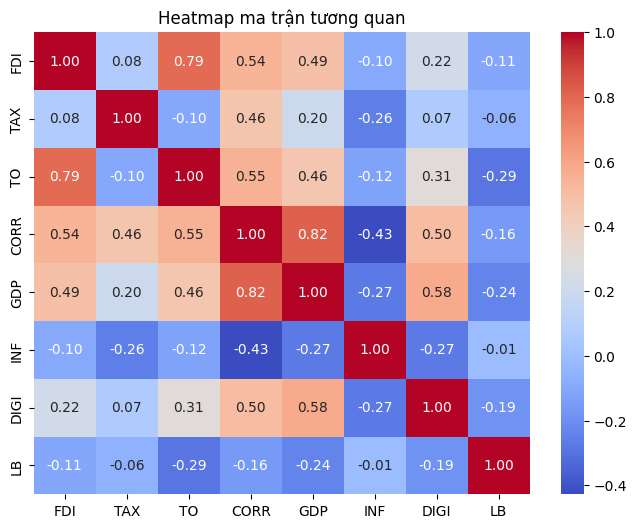

In [9]:
# 4. Heatmap (ma trận tương quan)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(8, 6))
corr_matrix = df[vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap ma trận tương quan")
plt.show()

### Mối quan hệ giữa FDI và các biến kinh tế

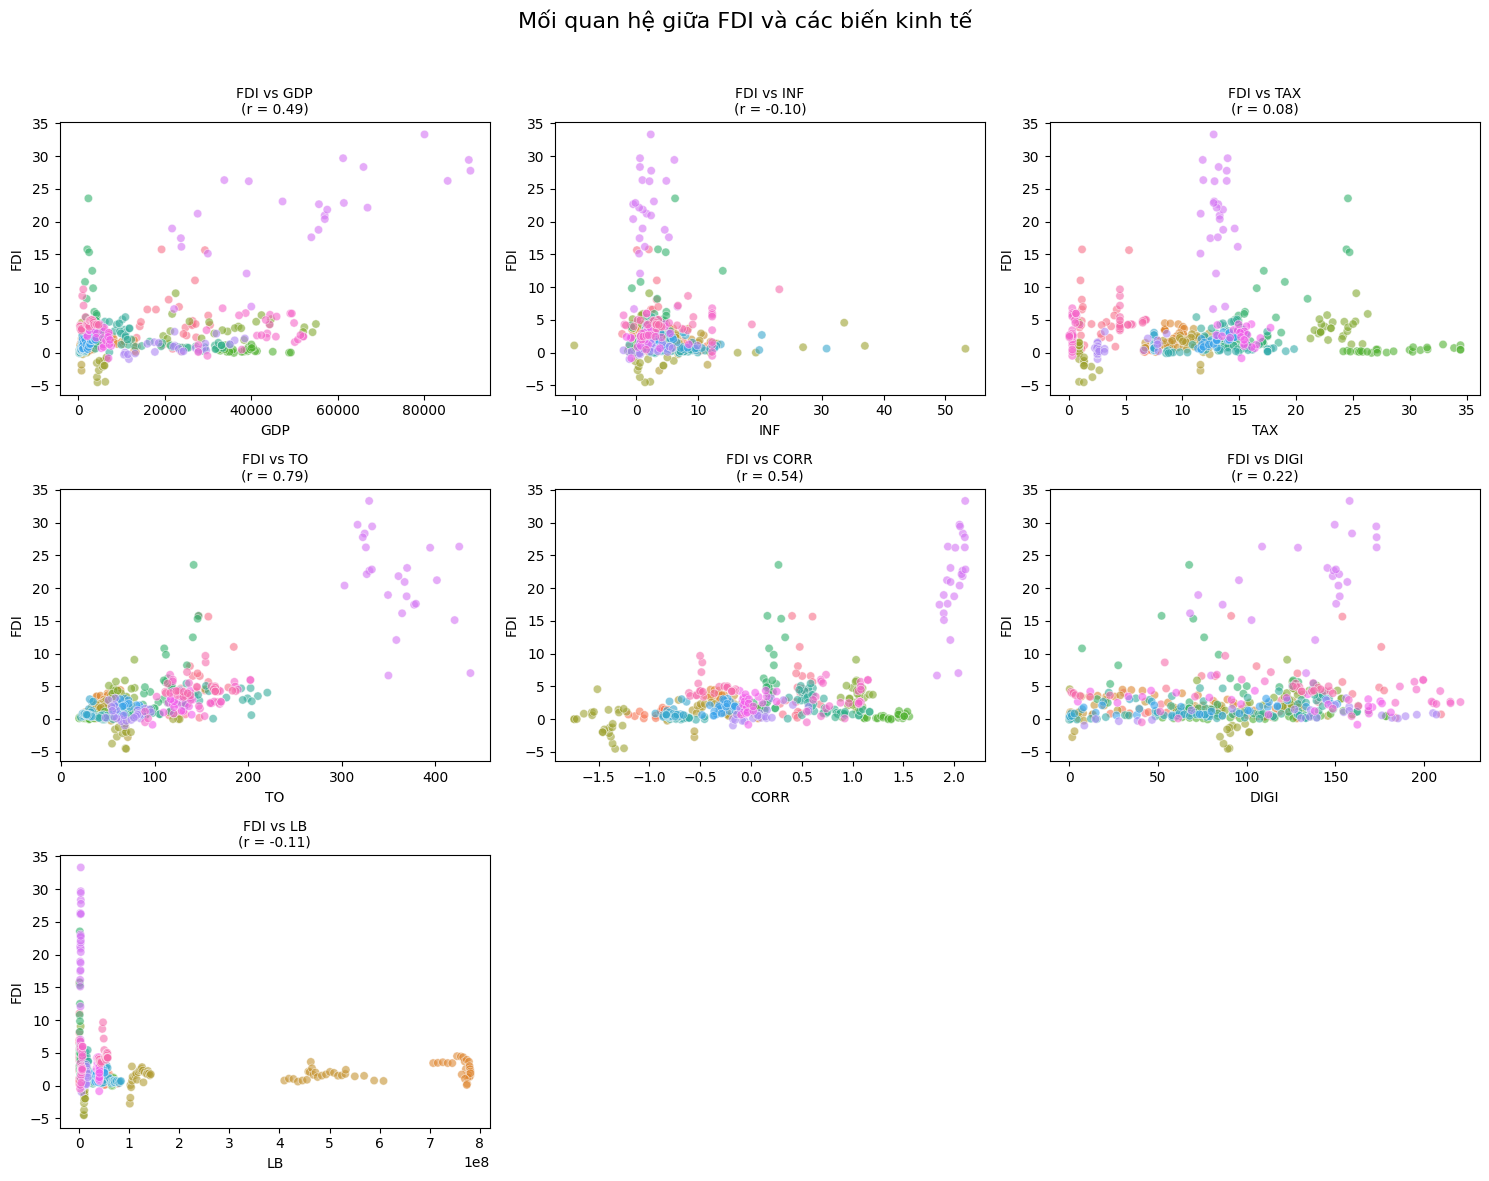

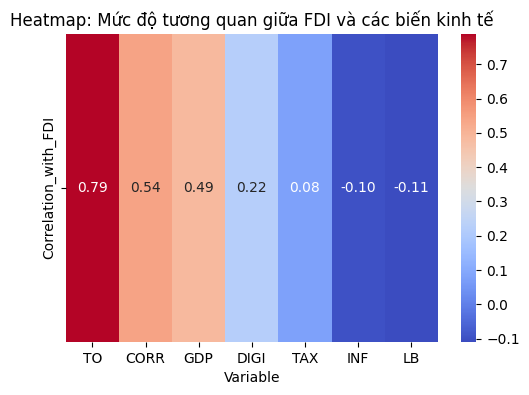

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chọn các biến
vars = ["GDP", "INF", "TAX", "TO", "CORR", "DIGI", "LB"]

# 1️⃣ Tính hệ số tương quan giữa FDI và các biến còn lại
corr_with_fdi = df[["FDI"] + vars].corr().loc["FDI", vars]
corr_table = pd.DataFrame({
    "Variable": vars,
    "Correlation_with_FDI": corr_with_fdi.values
}).sort_values(by="Correlation_with_FDI", ascending=False)

# 2️⃣ Vẽ biểu đồ scatter giữa FDI và từng biến
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars):
    sns.scatterplot(data=df, x=var, y="FDI", ax=axes[i], hue="ID", alpha=0.6, legend=False)
    axes[i].set_title(f"FDI vs {var}\n(r = {corr_with_fdi[var]:.2f})", fontsize=10)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("FDI")

# Ẩn các ô trống nếu số biến < số subplot
for j in range(len(vars), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Mối quan hệ giữa FDI và các biến kinh tế", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3️⃣ Vẽ heatmap thể hiện tương quan riêng FDI với các biến khác
plt.figure(figsize=(6, 4))
sns.heatmap(corr_table.set_index("Variable").T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Mức độ tương quan giữa FDI và các biến kinh tế")
plt.show()


## Kiểm định phân phối chuẩn

In [8]:
from scipy.stats import skew, kurtosis, normaltest

results = []
for v in vars:
    data = df[v].dropna()
    stat, p = normaltest(data)
    results.append({
        "Variable": v,
        "Skew": round(skew(data), 3),
        "Kurtosis": round(kurtosis(data), 3),
        "p-value": round(p, 3)
    })

sktest_table = pd.DataFrame(results)
sktest_table


,Variable,Skew,Kurtosis,p-value
0,FDI,3.193,11.148,0.000
1,TAX,0.693,0.434,0.000
2,TO,2.117,5.028,0.000
3,CORR,0.338,-0.320,0.004
4,GDP,1.428,1.731,0.000
5,INF,3.764,25.094,0.000
6,DIGI,-0.096,-0.747,0.000
7,LB,2.714,6.085,0.000


In [9]:
from scipy.stats import shapiro

results = []
for v in vars:
    data = df[v].dropna()
    stat, p = shapiro(data)
    results.append({
        "Variable": v,
        "W": round(stat, 3),
        "p-value": round(p, 3)
    })

swilk_table = pd.DataFrame(results)
swilk_table


,Variable,W,p-value
0,FDI,0.612,0.0
1,TAX,0.949,0.0
2,TO,0.769,0.0
3,CORR,0.980,0.0
4,GDP,0.787,0.0
5,INF,0.717,0.0
6,DIGI,0.974,0.0
7,LB,0.495,0.0


### Phân phối dữ liệu các biến kinh tế

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn biến quan trọng
vars = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

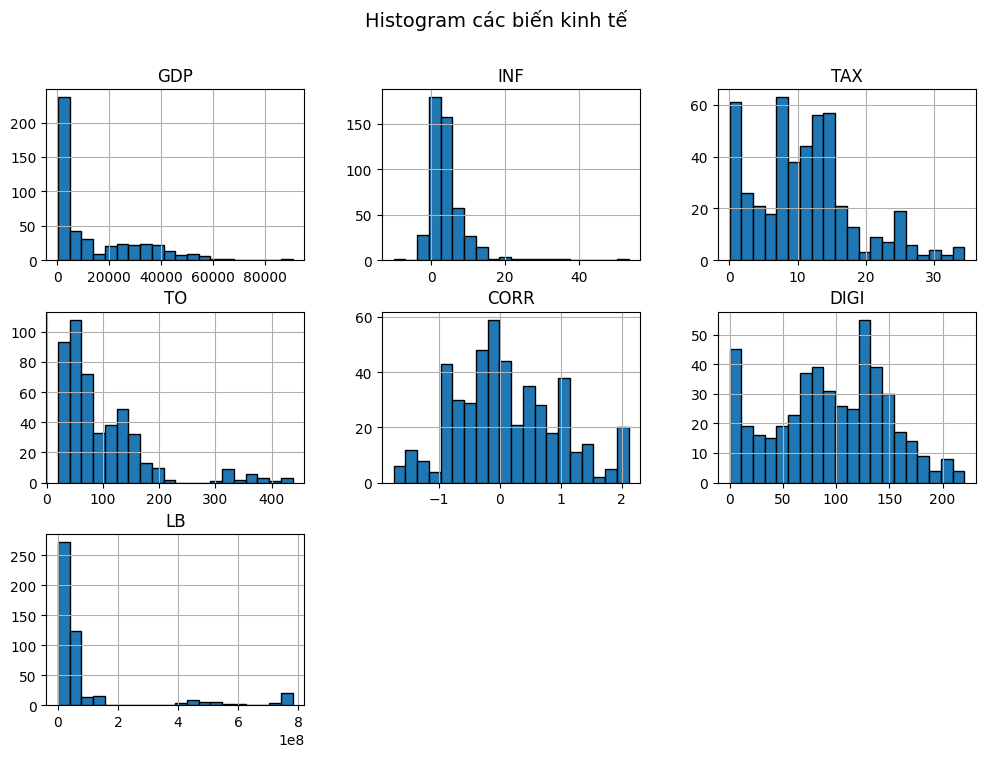

In [11]:

# 1. Histogram (phân phối dữ liệu)
df[vars].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histogram các biến kinh tế", fontsize=14)
plt.show()



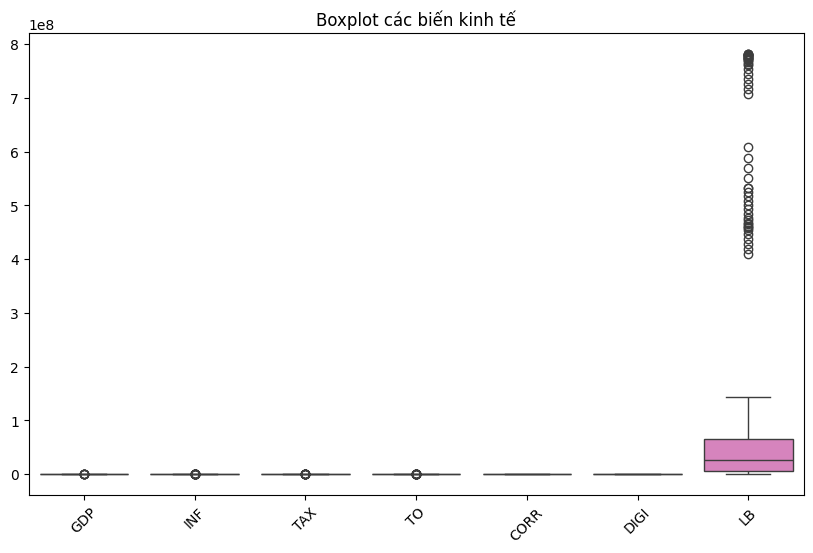

In [19]:
# 3. Boxplot (phát hiện ngoại lai)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[vars])
plt.xticks(rotation=45)
plt.title("Boxplot các biến kinh tế")
plt.show()


# PHÂN CỤM NÂNG CAO

## Phân cụm nâng cao theo FDI

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler

vars_used = ["FDI","TAX","TO","CORR","GDP","INF","DIGI","LB"]
df_cluster = df.groupby("ID")[vars_used].mean().dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


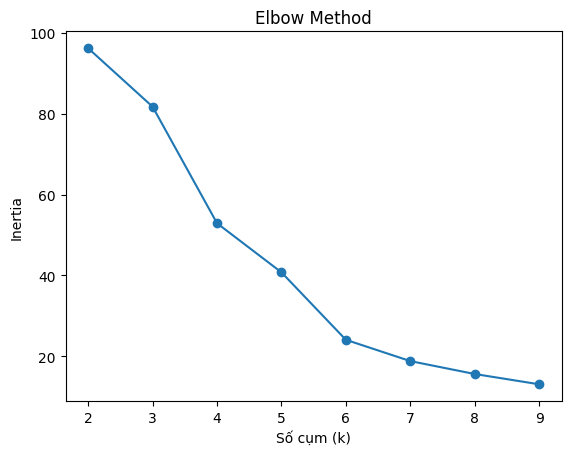

k=2, Silhouette Score=0.296
k=3, Silhouette Score=0.257
k=4, Silhouette Score=0.235
k=5, Silhouette Score=0.241
k=6, Silhouette Score=0.307
k=7, Silhouette Score=0.258
k=8, Silhouette Score=0.243
k=9, Silhouette Score=0.213


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Vẽ Elbow
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# In silhouette score
for k, score in zip(K_range, sil_scores):
    print(f"k={k}, Silhouette Score={score:.3f}")


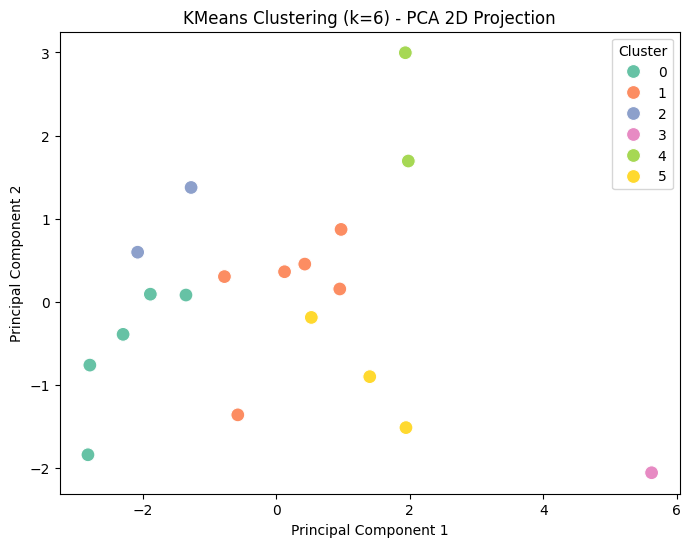

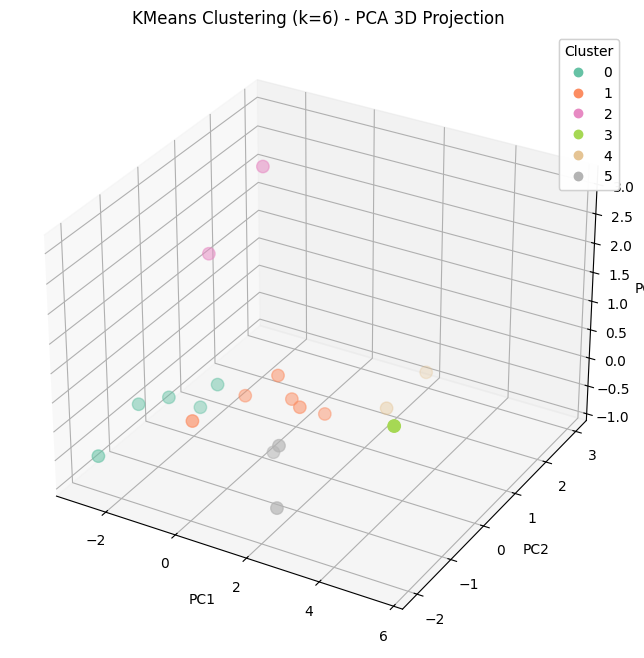

📋 Trung bình các biến theo từng cụm:
            FDI     TAX          TO   CORR        GDP    INF     DIGI            LB
Cluster                                                                            
0         0.563   8.118   48.383999 -0.840   2034.324  7.627   63.226  5.245357e+07
1         3.275  13.183  114.959999  0.160   7744.648  3.193   96.810  2.849397e+07
2         2.101   9.482   43.900002 -0.174   3913.504  4.055   62.524  6.272984e+08
3        21.277  13.082  358.598999  2.002  51477.180  1.878  134.310  2.955824e+06
4         2.075  26.157   47.980000  1.200  36629.688  1.072  117.656  3.541033e+07
5         3.057   2.185  122.000999  0.473  29406.937  3.019  136.482  5.310142e+06


In [15]:
# =========================================
# 📊 PHÂN CỤM KINH TẾ THEO CÁC BIẾN VĨ MÔ
# =========================================
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# --- 1. Chuẩn bị dữ liệu ---
vars_used = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# Tính trung bình theo từng quốc gia (ID)
df_grouped = df.groupby("ID")[vars_used].mean().dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped)

# --- 2. KMeans clustering ---
k = 6  # số cụm
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Gắn nhãn cụm vào DataFrame
df_cluster = df_grouped.copy()
df_cluster["Cluster"] = labels

# --- 3. PCA 2 thành phần để trực quan 2D ---
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels, palette="Set2", s=100)
plt.title(f"KMeans Clustering (k={k}) - PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# --- 4. PCA 3 thành phần để trực quan 3D ---
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
                     c=labels, cmap="Set2", s=80)

ax.set_title(f"KMeans Clustering (k={k}) - PCA 3D Projection")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Legend cụm
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

# --- 5. Bảng trung bình biến theo cụm ---
cluster_summary = df_cluster.groupby("Cluster")[vars_used].mean().round(3)
print("📋 Trung bình các biến theo từng cụm:")
print(cluster_summary)


Cụm 0:
 - Bangladesh
 - Indonesia
 - Iraq
 - Nepal
 - Pakistan
Cụm 1:
 - Jordan
 - Korea, Rep.
 - Malaysia
 - Philippines
 - Thailand
 - Viet Nam
Cụm 2:
 - China
 - India
Cụm 3:
 - Singapore
Cụm 4:
 - Israel
 - Japan
Cụm 5:
 - Bahrain
 - Saudi Arabia
 - United Arab Emirates


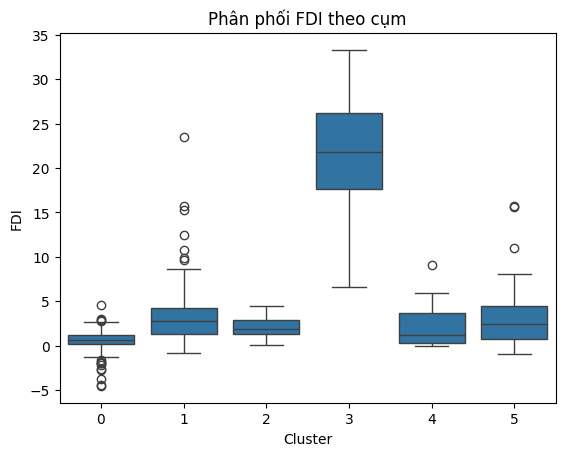

In [18]:
# Giả sử ID là tên quốc gia
for cluster in sorted(df_cluster["Cluster"].unique()):
    countries = df_cluster[df_cluster["Cluster"] == cluster].index.tolist()
    print(f"Cụm {cluster}:")
    for country in countries:
        print(f" - {country}")
df_merged = df.merge(df_cluster["Cluster"], left_on="ID", right_index=True)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Cluster", y="FDI", data=df_merged)
plt.title("Phân phối FDI theo cụm")
plt.show()



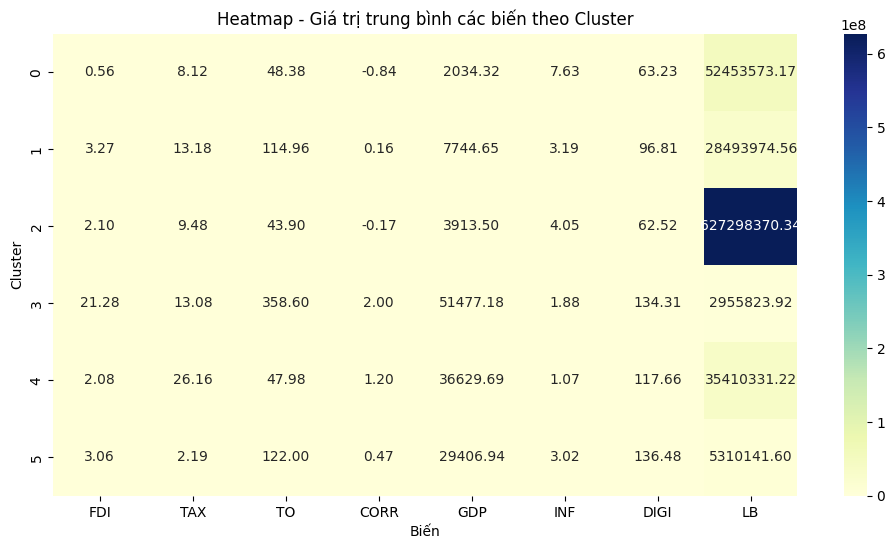

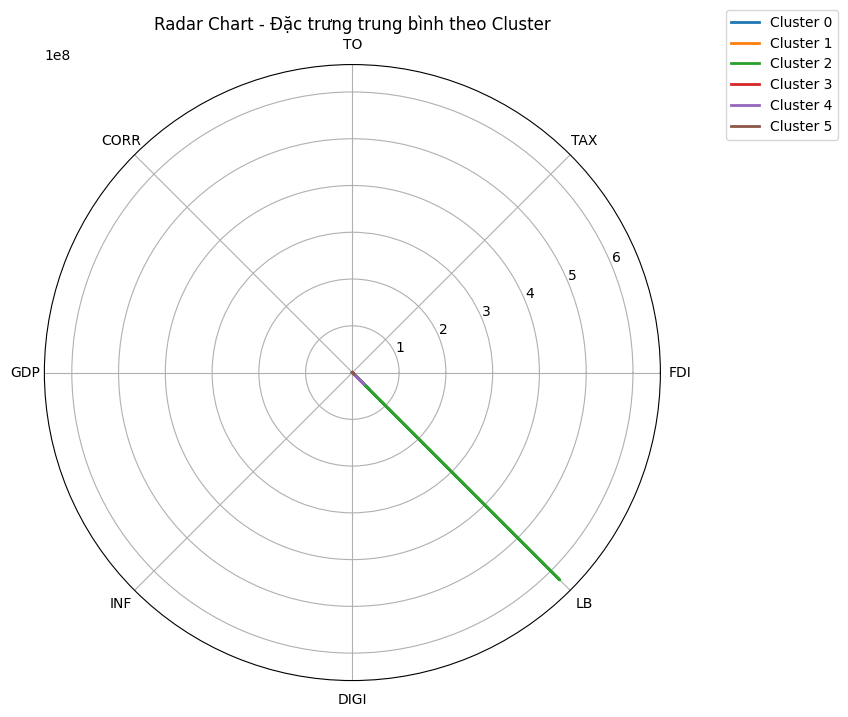

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dữ liệu trung bình theo cluster
cluster_summary = df_cluster.groupby("Cluster")[vars_used].mean()

# Vẽ heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap - Giá trị trung bình các biến theo Cluster")
plt.xlabel("Biến")
plt.ylabel("Cluster")
plt.show()

# Vẽ radar chart cho từng cluster
categories = vars_used
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(10,8))
for i, row in cluster_summary.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)

plt.xticks(angles[:-1], categories)
plt.title("Radar Chart - Đặc trưng trung bình theo Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


## Phân cụm nâng cao theo Tax

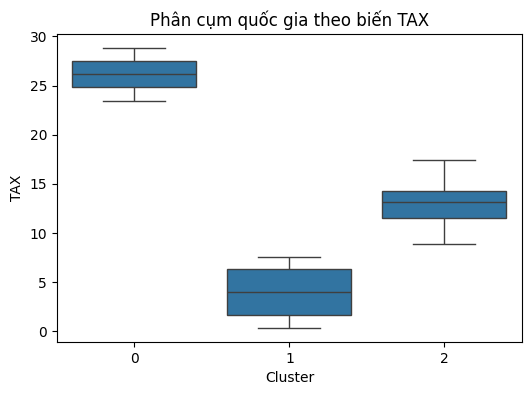

         count       mean       std      min      25%      50%      75%      max
Cluster                                                                         
0          2.0  26.157000  3.798860  23.4708  24.8139  26.1570  27.5001  28.8432
1          7.0   3.975486  2.894521   0.3616   1.6734   4.0376   6.2840   7.5144
2         10.0  13.046560  2.514808   8.8788  11.5727  13.1716  14.2957  17.4396


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy trung bình TAX theo quốc gia
df_tax = df.groupby("ID")["TAX"].mean().dropna().to_frame()

# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tax)

# KMeans với k=3 (ví dụ 3 nhóm thuế thấp – trung bình – cao)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Gắn nhãn vào df_tax
df_tax["Cluster"] = labels

# Vẽ boxplot để so sánh phân bố TAX theo cụm
plt.figure(figsize=(6,4))
sns.boxplot(x="Cluster", y="TAX", data=df_tax.reset_index())
plt.title("Phân cụm quốc gia theo biến TAX")
plt.show()

print(df_tax.groupby("Cluster")["TAX"].describe())


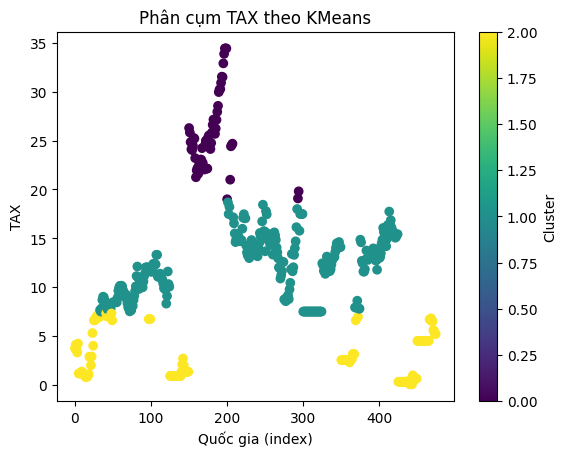

In [21]:
from sklearn.cluster import KMeans

# chỉ lấy cột TAX để phân cụm
X = df[['TAX']]

# chọn số cụm k = 3 (hoặc theo bạn muốn)
kmeans = KMeans(n_clusters=3, random_state=42)
df['TAX_cluster'] = kmeans.fit_predict(X)   # thêm cột cluster vào df
import matplotlib.pyplot as plt
plt.scatter(
    x=range(len(df)),                 # trục x là số thứ tự quốc gia
    y=df['TAX'],                      # trục y là giá trị TAX
    c=df['TAX_cluster'].astype(int),  # ép cluster thành int để tô màu
    cmap='viridis'
)
plt.xlabel('Quốc gia (index)')
plt.ylabel('TAX')
plt.title('Phân cụm TAX theo KMeans')
plt.colorbar(label='Cluster')
plt.show()



In [22]:
# Liệt kê quốc gia theo cụm
clusters = df.groupby("TAX_cluster")["CountryName"].unique()

for cluster, countries in clusters.items():
    print(f"\nCụm {cluster}:")
    for c in countries:
        print(" -", c)



Cụm 0:
 - Israel
 - Japan
 - Jordan
 - Nepal

Cụm 1:
 - Bangladesh
 - China
 - India
 - Indonesia
 - Jordan
 - Korea, Rep.
 - Malaysia
 - Nepal
 - Pakistan
 - Philippines
 - Saudi Arabia
 - Singapore
 - Thailand

Cụm 2:
 - Bahrain
 - Bangladesh
 - India
 - Iraq
 - Saudi Arabia
 - United Arab Emirates
 - Viet Nam


# PHÂN LỚP

✅ Các biến độc lập đưa vào mô hình:
 ['FDI', 'TAX', 'TO', 'CORR', 'GDP', 'INF', 'DIGI', 'LB', 'CC', 'GE', 'RQ', 'RL', 'EX', 'IM']
✅ Số lớp FDI: [2 0 1]

📊 Logistic Regression - Accuracy: 0.8112
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.71      0.73      0.72        48
           2       0.95      0.85      0.90        47

    accuracy                           0.81       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.81      0.81       143



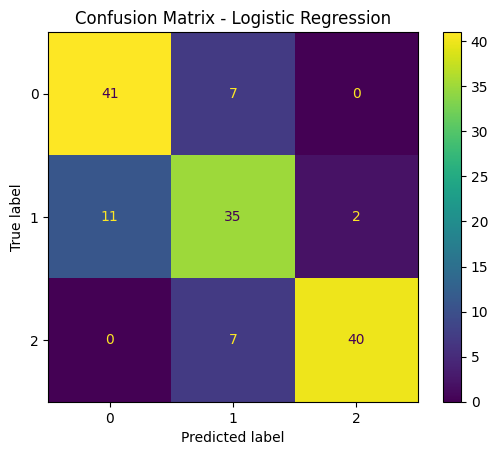


📊 Random Forest - Accuracy: 0.9930
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        47

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



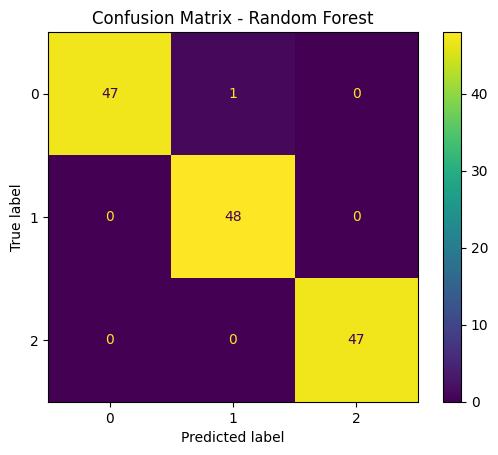


📊 XGBoost - Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        47

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



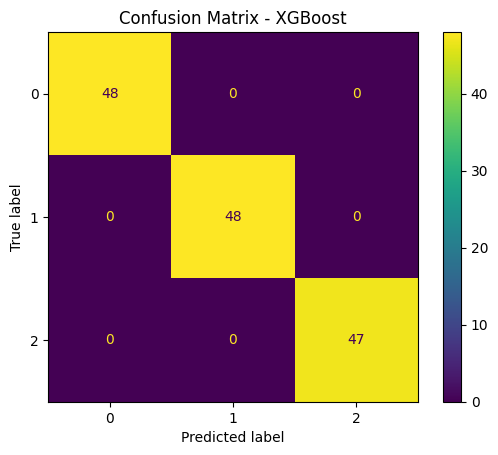


🔎 Bảng tổng hợp kết quả:
                 Model  Accuracy
0  Logistic Regression  0.811189
1        Random Forest  0.993007
2              XGBoost  1.000000


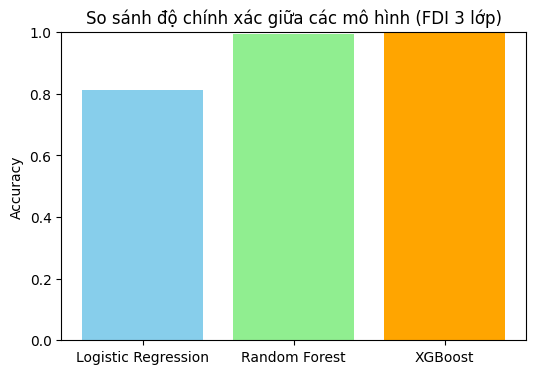

In [6]:
# ===========================
# 1️⃣ Import thư viện
# ===========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# ===========================
# 2️⃣ Chuẩn bị dữ liệu
df = pd.read_csv("FDI_cluster_category.csv")
# ===========================

# Loại bỏ các biến định danh và các biến không muốn dùng
X = df.drop(['FDI_category', 'CountryName', 'Cluster', 'TAX_cluster'], axis=1)

# Chỉ giữ lại các cột dạng số
X = X.select_dtypes(include=['float64', 'int64'])

# Biến mục tiêu
y = df['FDI_category']

# Kiểm tra lại dữ liệu
print("✅ Các biến độc lập đưa vào mô hình:\n", X.columns.tolist())
print("✅ Số lớp FDI:", y.unique())

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu (cho Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================
# 3️⃣ Khởi tạo mô hình
# ===========================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# ===========================
# 4️⃣ Huấn luyện & đánh giá
# ===========================
results = {}

for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_for_matrix = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_for_matrix = X_test
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📊 {name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_estimator(model, X_for_matrix, y_test)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ===========================
# 5️⃣ So sánh kết quả
# ===========================
result_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\n🔎 Bảng tổng hợp kết quả:")
print(result_df)

plt.figure(figsize=(6,4))
plt.bar(result_df['Model'], result_df['Accuracy'], color=['skyblue','lightgreen','orange'])
plt.title("So sánh độ chính xác giữa các mô hình (FDI 3 lớp)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()



🔹 Logistic Regression - Feature Importance:
   Feature  Importance
11      RL    0.617738
4      GDP    0.568982
5      INF   -0.033664
3     CORR   -0.066443
1      TAX   -0.145124
6     DIGI   -0.150301
8       CC   -0.154583
13      IM   -0.187698
9       GE   -0.204003
7       LB   -0.332227
2       TO   -0.403192
10      RQ   -0.500186
12      EX   -0.572325
0      FDI   -5.407224


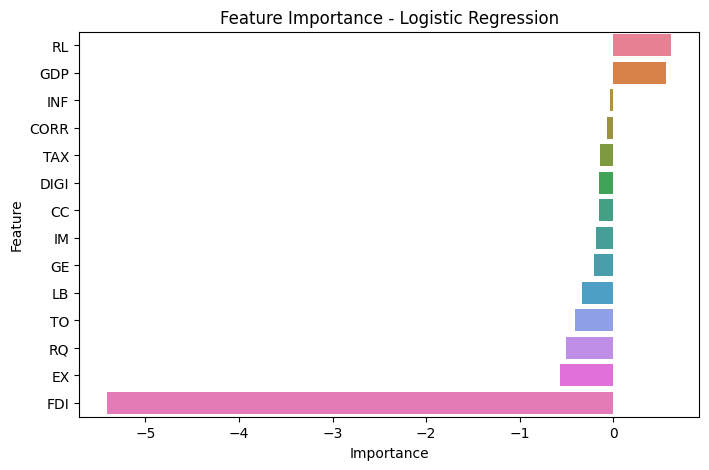


🔹 Random Forest - Feature Importance:
   Feature  Importance
0      FDI    0.484193
13      IM    0.084307
12      EX    0.069985
2       TO    0.063995
7       LB    0.049856
9       GE    0.035983
1      TAX    0.030731
3     CORR    0.029672
4      GDP    0.028812
6     DIGI    0.026413
10      RQ    0.025969
11      RL    0.025613
8       CC    0.022407
5      INF    0.022061


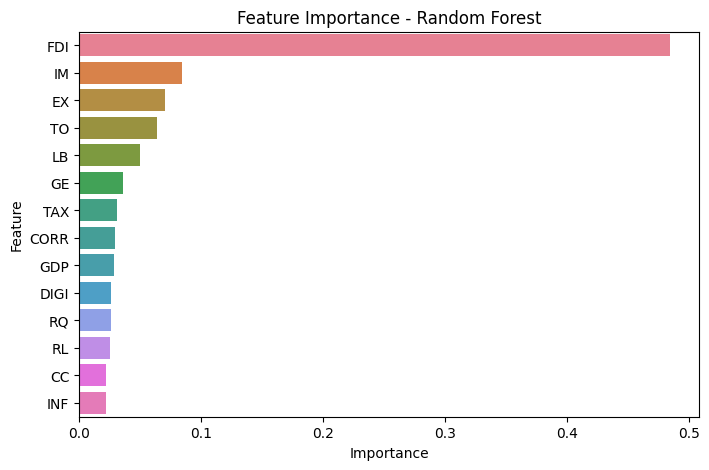


🔹 XGBoost - Feature Importance:
   Feature  Importance
0      FDI    0.998347
7       LB    0.000604
12      EX    0.000266
13      IM    0.000223
11      RL    0.000173
9       GE    0.000120
5      INF    0.000094
1      TAX    0.000091
6     DIGI    0.000081
2       TO    0.000000
4      GDP    0.000000
3     CORR    0.000000
8       CC    0.000000
10      RQ    0.000000


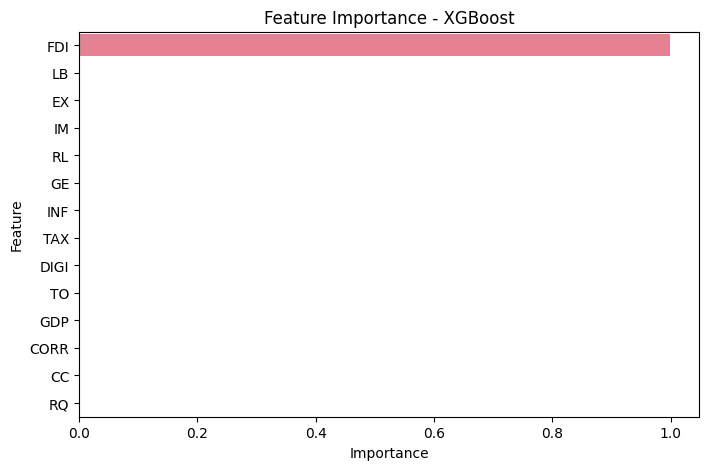

In [7]:
# ===========================
# 6️⃣ Feature Importance
# ===========================

import seaborn as sns

for name, model in models.items():
    if name == 'Logistic Regression':
        # Lấy hệ số
        importance = model.coef_[0]  # lớp đầu tiên (hoặc trung bình nếu multinomial)
    else:
        importance = model.feature_importances_
    
    feat_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\n🔹 {name} - Feature Importance:")
    print(feat_df)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=feat_df, hue='Feature', dodge=False, legend=False)
    plt.title(f"Feature Importance - {name}")
    plt.show()


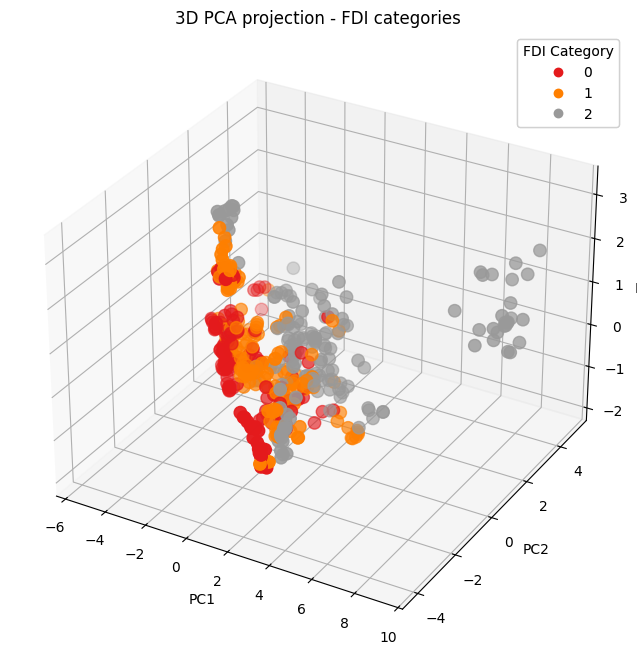

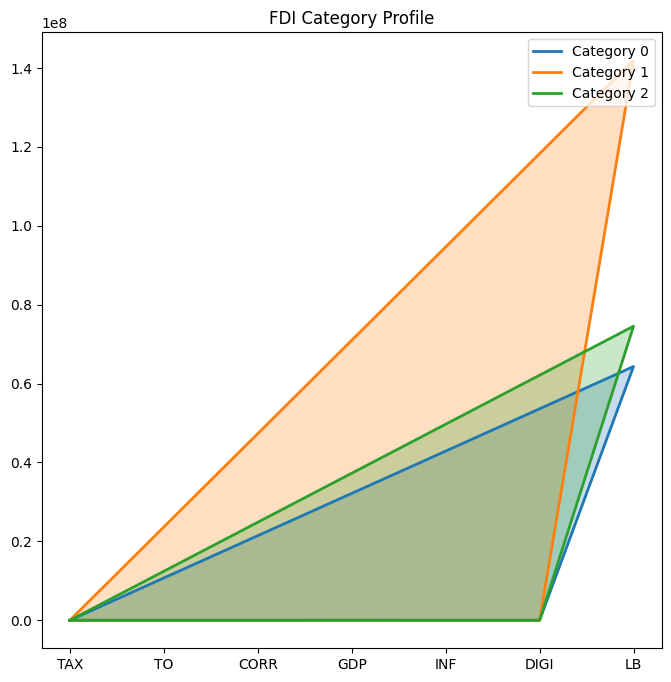

                    TAX          TO      CORR           GDP       INF  \
FDI_category                                                            
0             11.208742   55.761460 -0.208235  11932.689030  4.800064   
1             10.827342   76.340909  0.037638  11561.605957  4.180929   
2             11.217025  158.690479  0.525456  20326.365374  3.406800   

                    DIGI            LB  
FDI_category                            
0              79.310606  6.433222e+07  
1              99.268474  1.419635e+08  
2             105.904898  7.455271e+07  


In [9]:
# ===========================
# Chuẩn bị dữ liệu
# ===========================
# Loại bỏ các biến không cần thiết
X = df.drop(['FDI_category', 'CountryName', 'Cluster', 'TAX_cluster'], axis=1)
X = X.select_dtypes(include=['float64', 'int64'])  # chỉ giữ biến số

# Biến mục tiêu
y = df['FDI_category']

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # <- tạo biến X_scaled

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)  # X_scaled đã tồn tại

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
    c=y, cmap="Set1", s=80
)
ax.set_title("3D PCA projection - FDI categories")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
legend1 = ax.legend(*scatter.legend_elements(), title="FDI Category")
ax.add_artist(legend1)
plt.show()


# Radar chart profile (FDI categories)
# ===========================
def plot_radar(df_summary, title):
    categories = list(df_summary.columns)
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    plt.figure(figsize=(8,8))
    for idx, row in df_summary.iterrows():
        values = row.tolist()
        values += values[:1]
        plt.plot(angles, values, linewidth=2, label=f'Category {idx}')
        plt.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], categories)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Tóm tắt theo FDI_category
fdi_summary = df.groupby('FDI_category')[['TAX','TO','CORR','GDP','INF','DIGI','LB']].mean()
plot_radar(fdi_summary, "FDI Category Profile")


df_merged = df.copy()
df_merged['FDI_category'] = y  # nếu chưa có

summary_by_category = df_merged.groupby('FDI_category')[['TAX','TO','CORR','GDP','INF','DIGI','LB']].mean()
print(summary_by_category)

## Kết hợp giữa Cluster và FDI Category

FDI_category   0   1   2
Cluster                 
0             85  38   2
1             22  57  71
2              8  29  13
3              0   0  25
4             23   9  18
5             21  25  29


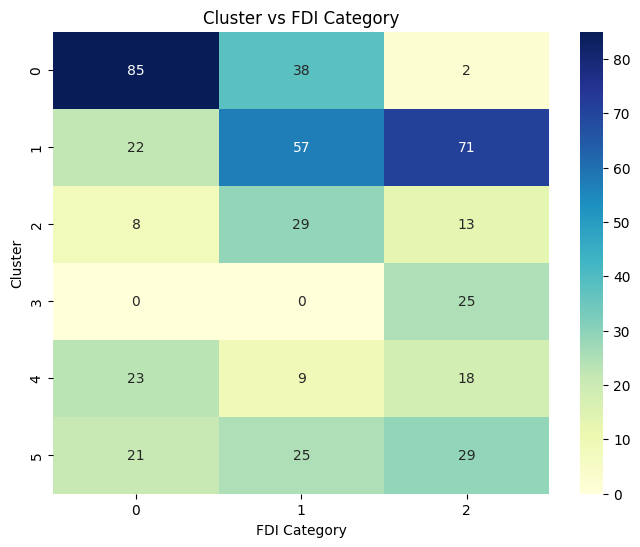

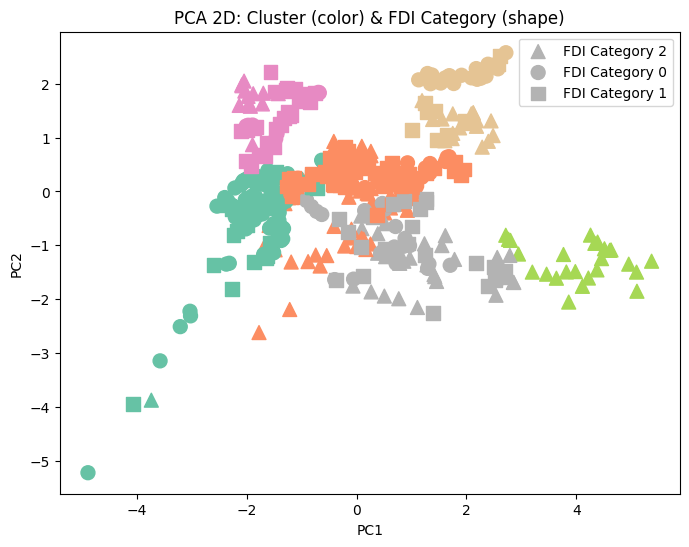

In [31]:
# ===========================
# 1️⃣ Chuẩn bị dữ liệu kết hợp
# ===========================
df_viz = df.merge(df_cluster["Cluster"], left_on="ID", right_index=True)

# Cross-tab: cluster vs FDI category
cross_tab = pd.crosstab(df_viz['Cluster'], df_viz['FDI_category'])
print(cross_tab)

# ===========================
# 2️⃣ Heatmap: Cluster vs FDI Category
# ===========================
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cluster vs FDI Category")
plt.xlabel("FDI Category")
plt.ylabel("Cluster")
plt.show()

# ===========================
# 3️⃣ Scatter plot PCA 2D + màu theo Cluster, shape theo FDI Category
# ===========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled từ phân cụm

plt.figure(figsize=(8,6))
markers = ["o", "s", "^"]  # tương ứng FDI category 0,1,2
for fdi_cat in df_viz['FDI_category'].unique():
    idx = df_viz['FDI_category'] == fdi_cat
    plt.scatter(
        X_pca[idx,0], X_pca[idx,1],
        c=df_viz.loc[idx, 'Cluster'],
        cmap='Set2',
        marker=markers[int(fdi_cat)],
        s=100,
        label=f'FDI Category {fdi_cat}'
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D: Cluster (color) & FDI Category (shape)")
plt.legend()
plt.show()


# HỒI QUY TUYẾN TÍNH

In [1]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects

# 1️⃣ Đọc dữ liệu (chỉnh đúng loại file của bạn)
df = pd.read_csv("Thuế_cleaned")  # hoặc .xlsx, .pkl, v.v.

# 2️⃣ Thiết lập dữ liệu dạng panel
df_panel = df.set_index(['ID', 'Time'])

# 3️⃣ Mô hình Fixed Effects (FE)
fe_model = PanelOLS.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB + EntityEffects',
    data=df_panel
)
fe_res = fe_model.fit(cov_type='robust')
print(fe_res.summary)

# 4️⃣ Mô hình Random Effects (RE)
re_model = RandomEffects.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB',
    data=df_panel
)
re_res = re_model.fit(cov_type='robust')
print(re_res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    FDI   R-squared:                        0.2020
Estimator:                   PanelOLS   R-squared (Between):              0.2127
No. Observations:                 475   R-squared (Within):               0.2020
Date:                Mon, Oct 13 2025   R-squared (Overall):              0.2111
Time:                        07:57:00   Log-likelihood                   -1039.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.237
Entities:                          19   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                   F(7,449)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             6.0916
                            

In [2]:
from linearmodels.panel import compare

comparison = compare({'FE': fe_res, 'RE': re_res})
print(comparison)



                    Model Comparison                   
                                   FE                RE
-------------------------------------------------------
Dep. Variable                     FDI               FDI
Estimator                    PanelOLS     RandomEffects
No. Observations                  475               475
Cov. Est.                      Robust            Robust
R-squared                      0.2020            0.3228
R-Squared (Within)             0.2020            0.1618
R-Squared (Between)            0.2127            0.7603
R-Squared (Overall)            0.2111            0.6673
F-statistic                    16.237            31.866
P-value (F-stat)               0.0000            0.0000
=====================     ===========   ===============
TAX                            0.2781            0.0332
                             (2.7773)          (0.6099)
TO                             0.0166            0.0241
                             (1.6836)          (

In [20]:
# ============================================
# 1️⃣ IMPORT THƯ VIỆN
# ============================================
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS, BetweenOLS, FamaMacBeth, compare

# ============================================
# 2️⃣ ĐỌC DỮ LIỆU
# ============================================
# ⚠️ Sửa đúng tên file dữ liệu của bạn
df = pd.read_csv("Thuế_cleaned")

# ============================================
# 3️⃣ THIẾT LẬP DỮ LIỆU PANEL
# ============================================
# Giả sử có 2 cột định danh: ID (quốc gia/doanh nghiệp) và Time (năm)
df_panel = df.set_index(['ID', 'Time'])

# ============================================
# 4️⃣ CÁC MÔ HÌNH HỒI QUY THEO TRÌNH TỰ NGHIÊN CỨU
# ============================================

# 4.1️⃣ OLS THƯỜNG (cross-section reference)
X = df_panel[['TAX', 'TO', 'CORR', 'GDP', 'INF', 'DIGI', 'LB']]
X = sm.add_constant(X)
y = df_panel['FDI']

ols_model = sm.OLS(y, X).fit()
print("\n=== CLASSIC OLS MODEL ===")
print(ols_model.summary())

# 4.2️⃣ POOLED OLS — mô hình gộp (không phân biệt hiệu ứng)
pooled_ols = PooledOLS.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB',
    data=df_panel
)
pooled_res = pooled_ols.fit(cov_type='robust')
print("\n=== POOLED OLS MODEL ===")
print(pooled_res.summary)

# 4.3️⃣ FIXED EFFECTS (FE) — mô hình tác động cố định
fe_model = PanelOLS.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB + EntityEffects',
    data=df_panel
)
fe_res = fe_model.fit(cov_type='robust')
print("\n=== FIXED EFFECTS MODEL ===")
print(fe_res.summary)

# 4.4️⃣ RANDOM EFFECTS (RE) — mô hình tác động ngẫu nhiên
re_model = RandomEffects.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB',
    data=df_panel
)
re_res = re_model.fit(cov_type='robust')
print("\n=== RANDOM EFFECTS MODEL ===")
print(re_res.summary)

import numpy as np
from scipy import stats

# --- KIỂM ĐỊNH HAUSMAN GIỮA FE VÀ RE ---
# Lấy hệ số và ma trận hiệp phương sai
b_FE = fe_res.params
b_RE = re_res.params
V_FE = fe_res.cov
V_RE = re_res.cov

# Giữ lại các biến chung cho cả hai mô hình
common_coef = b_FE.index.intersection(b_RE.index)
b_FE = b_FE.loc[common_coef]
b_RE = b_RE.loc[common_coef]
V_FE = V_FE.loc[common_coef, common_coef]
V_RE = V_RE.loc[common_coef, common_coef]

# Tính thống kê Hausman
b_diff = b_FE - b_RE
V_diff = V_FE - V_RE

# Đảm bảo V_diff khả nghịch
from numpy.linalg import inv
H = np.dot(np.dot(b_diff.T, inv(V_diff)), b_diff)
p_value = 1 - stats.chi2.cdf(H, len(b_diff))

print("\n=== KIỂM ĐỊNH HAUSMAN (FE vs RE) ===")
print(f"Giá trị thống kê Hausman: {H:.4f}")
print(f"Giá trị p-value: {p_value:.4f}")

if p_value < 0.05:
    print("➡ Kết luận: Bác bỏ H0 → Mô hình FE (Fixed Effects) phù hợp hơn.")
else:
    print("➡ Kết luận: Không bác bỏ H0 → Mô hình RE (Random Effects) phù hợp hơn.")



# 4.5️⃣ BETWEEN EFFECTS — mô hình hồi quy giữa các thực thể
be_model = BetweenOLS.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB',
    data=df_panel
)
be_res = be_model.fit(cov_type='robust')
print("\n=== BETWEEN EFFECTS MODEL ===")
print(be_res.summary)

# 4.6️⃣ FGLS (Fama-MacBeth) — mô hình GLS khắc phục phương sai thay đổi
fgls_model = FamaMacBeth.from_formula(
    'FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB',
    data=df_panel
)
fgls_res = fgls_model.fit()
print("\n=== FGLS (Fama-MacBeth) MODEL ===")
print(fgls_res.summary)



=== CLASSIC OLS MODEL ===
                            OLS Regression Results                            
Dep. Variable:                    FDI   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     157.2
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.76e-118
Time:                        08:19:03   Log-Likelihood:                -1170.0
No. Observations:                 475   AIC:                             2356.
Df Residuals:                     467   BIC:                             2389.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3321    

In [22]:
# ============================================
# HIỂN THỊ 1 BẢNG DUY NHẤT: HỆ SỐ + MỨC Ý NGHĨA
# ============================================

# Tạo bảng hiển thị: mỗi biến (Variable) là một hàng, mỗi mô hình (Model) là một cột
table_one = (
    sig_table
    .assign(Coef_Sig=lambda x: x['Coef'].astype(str) + x['Signif'])  # gộp hệ số + dấu ***
    .pivot(index='Variable', columns='Model', values='Coef_Sig')      # mỗi model 1 cột
)

# Làm sạch dữ liệu (loại bỏ "nan" nếu có)
table_one = table_one.replace('nan', '', regex=True)

desired_order = ['OLS', 'Pooled OLS', 'FE', 'RE', 'Between', 'FGLS (FM)']
table_one = table_one[[col for col in desired_order if col in table_one.columns]]

# Cài đặt hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2200)
pd.set_option('display.colheader_justify', 'center')  # căn giữa tiêu đề

print("\n=== BẢNG TỔNG HỢP HỆ SỐ VÀ MỨC Ý NGHĨA  ===")
print(table_one.to_string())



=== BẢNG TỔNG HỢP HỆ SỐ VÀ MỨC Ý NGHĨA  ===
Model         OLS        Pooled OLS        FE            RE         Between      FGLS (FM)  
Variable                                                                                    
CORR       -1.40284***   1.018807***     1.300604*      0.786351     -0.220454   1.183115***
DIGI      -0.009818***  -0.020542***  -0.011169***  -0.009578***  -0.055583***  -0.029017***
GDP        0.000102***      4.7e-05*   0.000149***   0.000119***       8.9e-05         9e-06
INF           0.044217      0.010134   0.074998***   0.061385***     -0.056759   0.158098***
LB              0.0***        0.0***           0.0           0.0        0.0***        0.0***
TAX        0.164682***     -0.001753   0.278143***      0.033214      0.097789   0.041054***
TO         0.058653***   0.044768***     0.016646*   0.024093***   0.062542***   0.053369***
const     -5.332106***           NaN           NaN           NaN           NaN           NaN
